# Logistic Regression

## Function

$$
h\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
$$

Same as Linear Regression but with its output passed to the logisitc funcion:

$$
g(x) = \frac{1}{1 + e^{-x}}
$$

Taking it's derivative:

$$
\begin{aligned}
    \frac{d}{dx} g(x) & = \frac{d}{dx} \left[ \left( 1 + e^{-x} \right)^{-1} \right] \\
                      & = -(1 + e^{-x})^-2 \frac{d}{dx} \left[ 1 + e^{-x} \right] \\
                      & = -(1 + e^{-x})^{-2} e^{-x} \frac{d}{dx} \left[ -x \right] \\
                      & = (1 + e^{-x})^{-2} e^{-x} \\
                      & = \frac{1}{(1 + e^{-x})^2} e^{-x} \\
                      & = g(x)(1 - g(x)) \\
\end{aligned}
$$

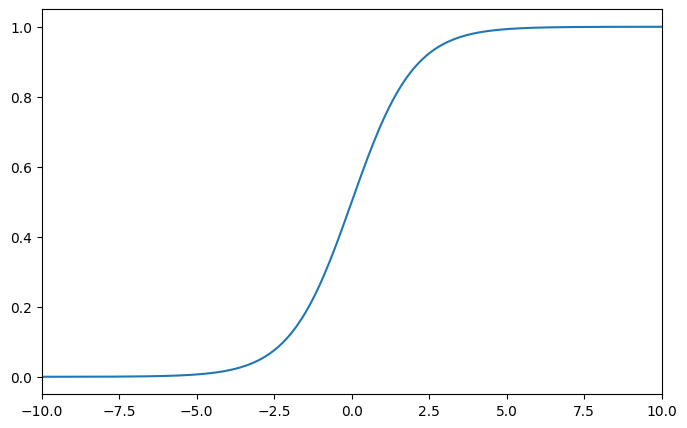

In [2]:
import numpy as np
import matplotlib.pyplot as plt

step = 0.10
x = np.arange(-10, 10 + step, step)
y = np.pow(1 + np.exp(-x), -1)

plt.figure(figsize=(8, 5))
plt.xlim(x.min(), x.max())
plt.plot(x, y);

Logisitic Regression is a classifier model, so the logistic function can be thought as the probability that the independent variable $x$ is of class 1.

$$
\begin{aligned}
p(x \text{ is of class } 1) & = g(x) \\
p(x \text{ is of class } 0) & = 1 - g(x) \\
\end{aligned}
$$

## Logistic Loss Function

$$
\mathit{Loss}(h_\theta(x), y) =
    \begin{cases}
        -\log(h_\theta(x)) &,  y = 1 \\
        -\log(1 - h_\theta(x)) &,  y = 0
    \end{cases}
$$

Because $y \in {0, 1}$, the function can be expressed without the cases in the following way:

$$
\mathit{Loss}(h_\theta(x), y) = -y\log(h_\theta(x)) - (1 - y)\log(1 - h_\theta(x))
$$

So when $y = 1$ the above expression becomes $-\log(h_\theta(x))$, and when $y = 0$ it becomes $-\log(1-h\theta(x))$.

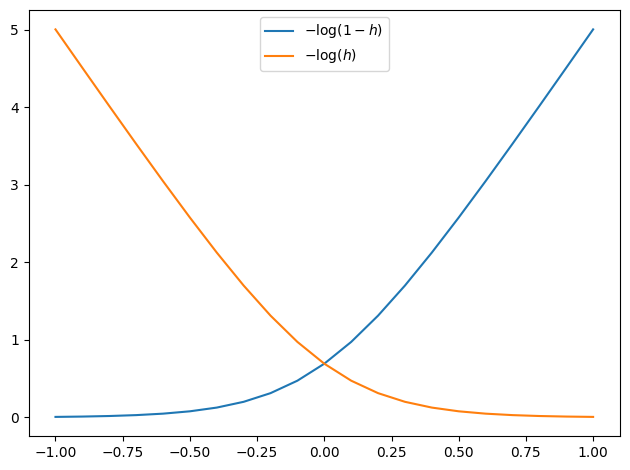

In [ ]:
b, w = 0, 5

def linear(x): return b + w * x
def logisitc(x): return np.pow(1 + np.exp(-x), -1)

x = np.arange(-1, 1.1, 0.1)
h = logisitc(linear(x))

y0 = -np.log(1 - h)
y1 = -np.log(h)

plt.plot(x, y0, label=r"$-\log(1 - h)$");
plt.plot(x, y1, label=r"$-\log(h)$");
plt.tight_layout()
plt.legend(loc="upper center");

Expressing the loss function with respect to the parameters because it's what we want to optimize ($x$ and $y$ are constants during training):

$$
J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^{m} y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))
$$

Taking the gradient with respect to the whole parameter vector $\theta$:

$$
\begin{aligned}
    \nabla J(\theta) & = -\frac{1}{m} \nabla \left[ \sum\limits_{i=1}^{m} y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) \right] \\
                     & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}\frac{1}{h_\theta(x^{(i)})} \nabla \left[ h_\theta(x^{(i)}) \right]
                            - (1 - y^{(i)}) \frac{1}{1 - h_\theta(x^{(i)})} \nabla \left[ h_\theta(x^{(i)}) \right]\right)
\end{aligned}
$$

From the previous derivation of $g(x)$ we know that:

$$
    \frac{d}{dx} g(x) = g(x)(1 - g(x)) \\
$$

since:

$$
h_\theta(x^{(i)}) = g(\theta^Tx^{(i)})
$$

its gradient w.r.t. $\theta$ is:
$$
\nabla h_\theta(x^{(i)}) = h_\theta(x^{(i)})(1 - h_\theta(x^{(i)}))x^{(i)}
$$

Therefore: 

$$
\begin{aligned}
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}\frac{x^{(i)}}{h_\theta(x^{(i)})} h_\theta(x^{(i)}) \left( 1 - h_\theta(x^{(i)})\right)
        - (1 - y^{(i)}) \frac{x^{(i)}}{1 - h_\theta(x^{(i)})} h_\theta(x^{(i)}) \left( 1 - h_\theta(x^{(i)}) \right) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)}\left( 1 - h_\theta(x^{(i)})\right)
        - (1 - y^{(i)})x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)} - y^{(i)}x^{(i)}h_\theta(x^{(i)})
        - x^{(i)}h_\theta(x^{(i)}) + y^{(i)}x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)} - x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \sum\limits_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right) x^{(i)} \\
\end{aligned}
$$